In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load Data

In [2]:
df=pd.read_csv("relationships_advise_19_final.csv",sep=";")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# General

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448110 entries, 0 to 448109
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             448110 non-null  object 
 1   Toxicity           439265 non-null  float64
 2   Severe Toxicity    439265 non-null  float64
 3   Profanity          439265 non-null  float64
 4   Identity Attack    439265 non-null  float64
 5   Insult             439265 non-null  float64
 6   Threat             439265 non-null  float64
 7   author_flair_text  448110 non-null  object 
 8   body               448110 non-null  object 
 9   controversiality   448110 non-null  bool   
 10  created_utc        448110 non-null  object 
 11  distinguished      448110 non-null  object 
 12  edited             448110 non-null  bool   
 13  gilded             448110 non-null  int64  
 14  id                 448110 non-null  object 
 15  link_id            448110 non-null  object 
 16  pa

In [4]:
df.describe()

Toxicity  Severe Toxicity      Profanity  Identity Attack  \
count  439265.000000    439265.000000  439265.000000    439265.000000   
mean        0.218310         0.032697       0.155143         0.030320   
std         0.228527         0.087214       0.219772         0.064434   
min         0.000000         0.000112       0.000000         0.000163   
25%         0.040431         0.001545       0.019007         0.004125   
50%         0.113160         0.003376       0.042414         0.007844   
75%         0.335877         0.014124       0.192787         0.023796   
max         0.998774         1.000000       1.000000         0.965517   

              Insult         Threat         gilded          score  \
count  439265.000000  439265.000000  448110.000000  448110.000000   
mean        0.122024       0.031304       0.000424       9.789804   
std         0.176109       0.075813       0.025260     122.341467   
min         0.001621       0.000000       0.000000    -473.000000   
25%         0.014809       0.007431       0.000000       1.000000   
50%         0.031367       0.008894       0.000000       1.000000   
75%         0.156274       0.013114       0.000000       3.000000   
max         0.992411       0.996675       7.000000   23396.000000   

        created_hour    created_day  created_year    comment_len  \
count  448110.000000  448110.000000      448110.0  448110.000000   
mean       12.564214      15.503356        2019.0      58.222354   
std         7.258202       8.438749           0.0      70.446740   
min         0.000000       1.000000        2019.0       1.000000   
25%         6.000000       8.000000        2019.0      17.000000   
50%        14.000000      15.000000        2019.0      37.000000   
75%        19.000000      23.000000        2019.0      74.000000   
max        23.000000      30.000000        2019.0    1986.000000   

            compound      Sentiment  
count  448110.000000  448110.000000  
mean        0.160018       0.216757  
std         0.584851       0.907812  
min        -0.999800      -1.000000  
25%        -0.296000      -1.000000  
50%         0.201400       1.000000  
75%         0.693000       1.000000  
max         0.999800       1.000000

# One Feature

# Controversilty

In [5]:
df["controversiality"] = df["controversiality"].replace(0,"0")
df["controversiality"] = df["controversiality"].replace(1,"1")
df["controversiality"]= df["controversiality"].replace("0",False)
df["controversiality"] = df["controversiality"].replace("1",True)


False    438030
True      10080
Name: controversiality, dtype: int64


Text(0, 0.5, '')

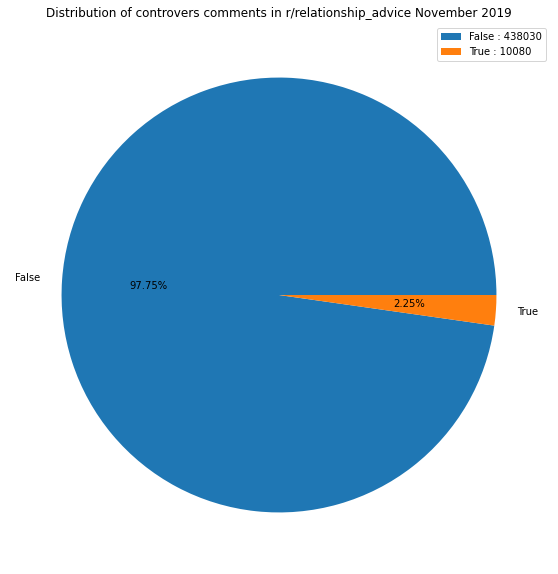

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df["controversiality"].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of controvers comments in r/relationship_advice November 2019")
plt.ylabel('')  # Remove y-axis label for clarity

# How many submissions (link_id)

In [7]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 36740


# Which submission have the most interaction/comments

t3_dv9afw    5244
t3_e025s8    3659
t3_dwmlki    3625
t3_dsj4nn    3131
t3_dtynnb    2600
             ... 
t3_dttdm0       1
t3_dttelx       1
t3_dtt2ly       1
t3_dtu373       1
t3_e45xux       1
Name: link_id, Length: 36740, dtype: int64


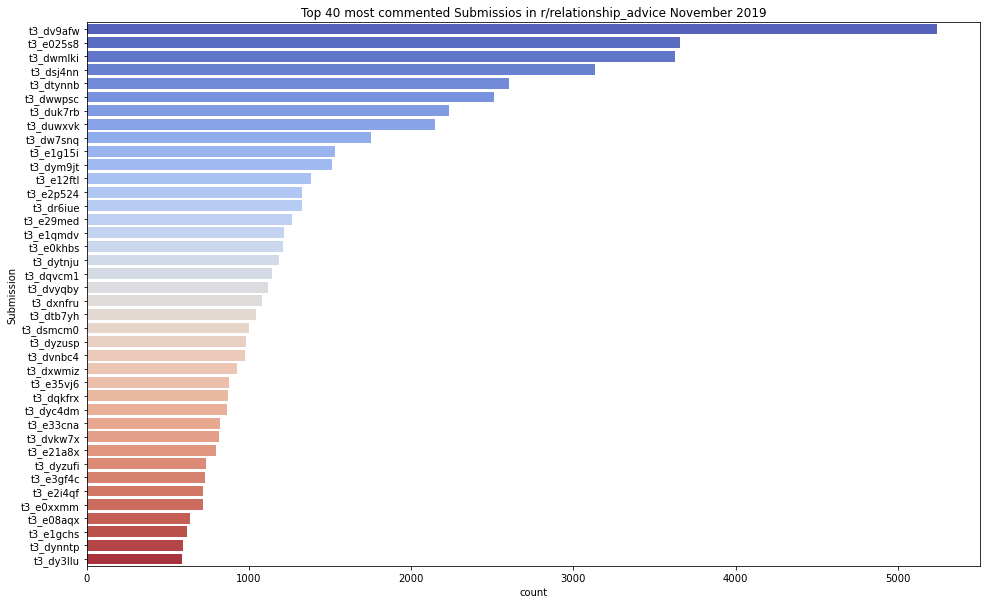

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)

# Ändere die Beschriftung von "link_id" zu "Submission"
plt.ylabel("Submission")
plt.title("Top 40 most commented Submissios in r/relationship_advice November 2019")

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())


t3_dv9afw    5244
t3_e025s8    3659
t3_dwmlki    3625
t3_dsj4nn    3131
t3_dtynnb    2600
             ... 
t3_dttdm0       1
t3_dttelx       1
t3_dtt2ly       1
t3_dtu373       1
t3_e45xux       1
Name: link_id, Length: 36740, dtype: int64


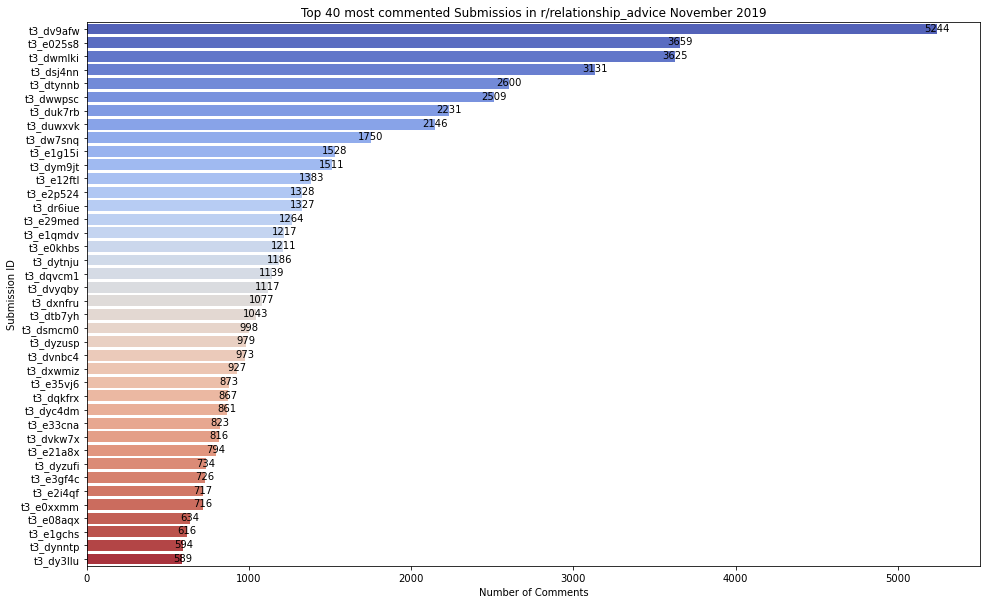

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index, ax=ax)

# Ändere die Beschriftung von "link_id" zu "Submission"
ax.set_ylabel("Submission ID")
ax.set_xlabel("Number of Comments")
plt.title("Top 40 most commented Submissios in r/relationship_advice November 2019")

# Anzeige der Anzahl in den Bars
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2 - 0.1, 
            f'{int(p.get_width())}', ha='center', va='center')

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())







# Average number of Comments per Submission per day

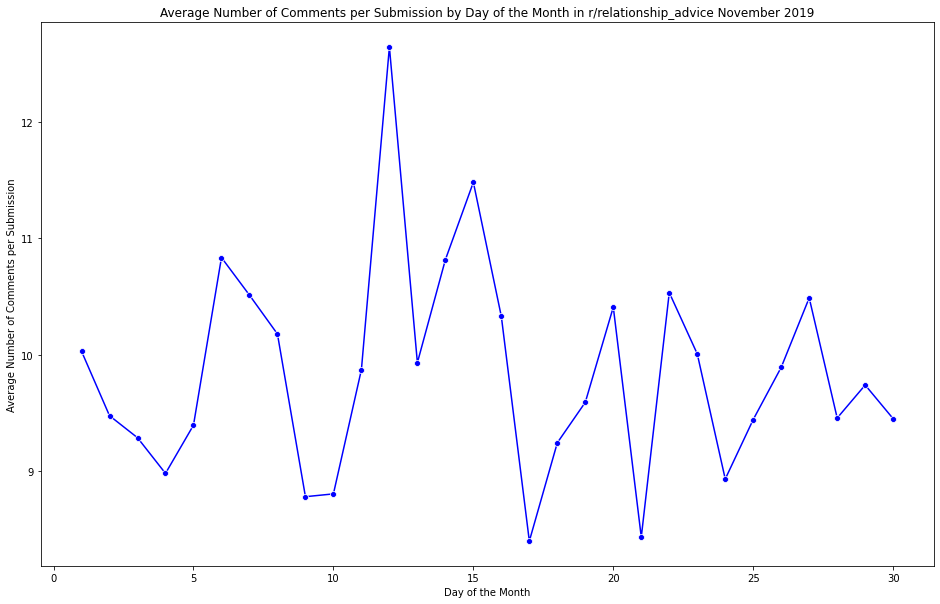

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each day
avg_comments_per_link_id = df.groupby(['created_day', 'link_id']).size().groupby('created_day').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id, x='created_day', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Day of the Month in r/relationship_advice November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Average number of Comments per Submission per h

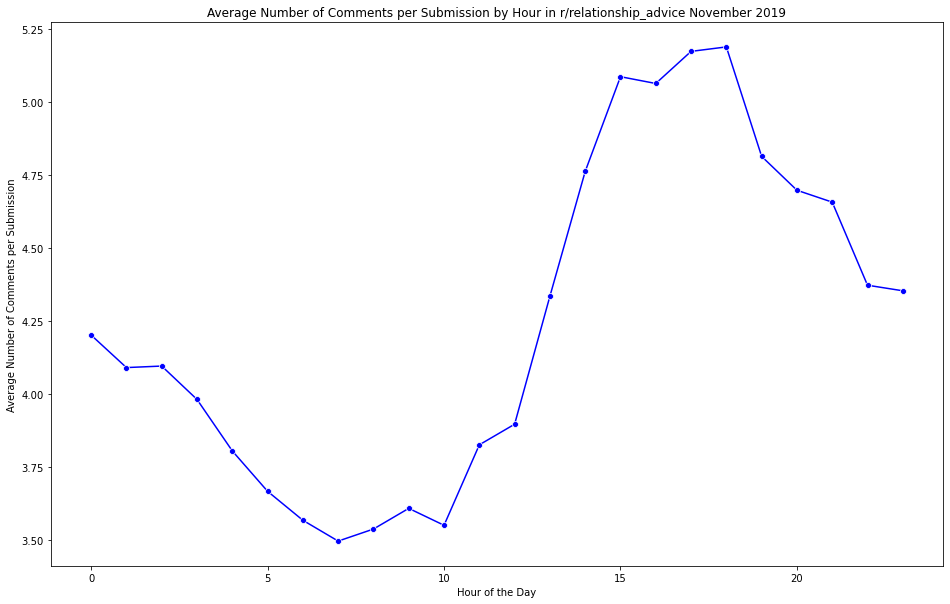

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each hour
avg_comments_per_link_id_hourly = df.groupby(['created_hour', 'link_id']).size().groupby('created_hour').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id_hourly, x='created_hour', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Author

# Who are the Authors/users with the most comments?

# With deleted

Text(0.5, 1.0, 'Top 20 users with the most comments in r/relationship_advice November 2019')

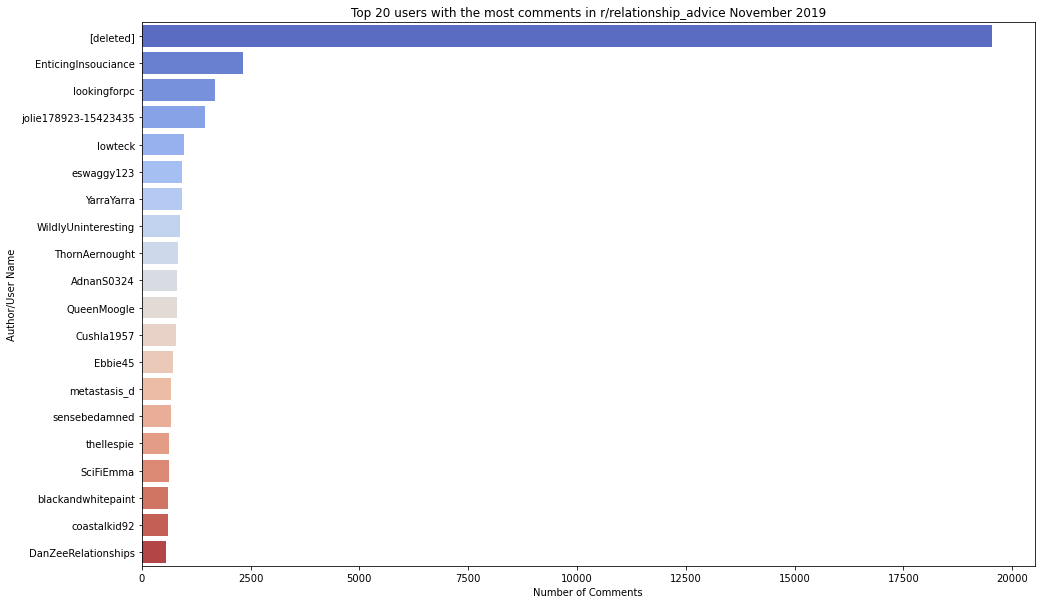

In [12]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)
plt.xlabel("Number of Comments")
plt.ylabel("Author/User Name")
plt.title("Top 20 users with the most comments in r/relationship_advice November 2019")


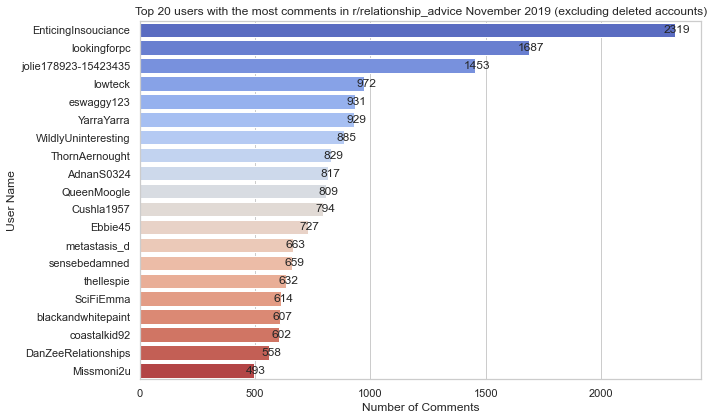

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("User Name")
plt.title("Top 20 users with the most comments in r/relationship_advice November 2019 (excluding deleted accounts)")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [14]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 88362


In [15]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 12.20


In [16]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 5.07


# The average number of comments per author per hour

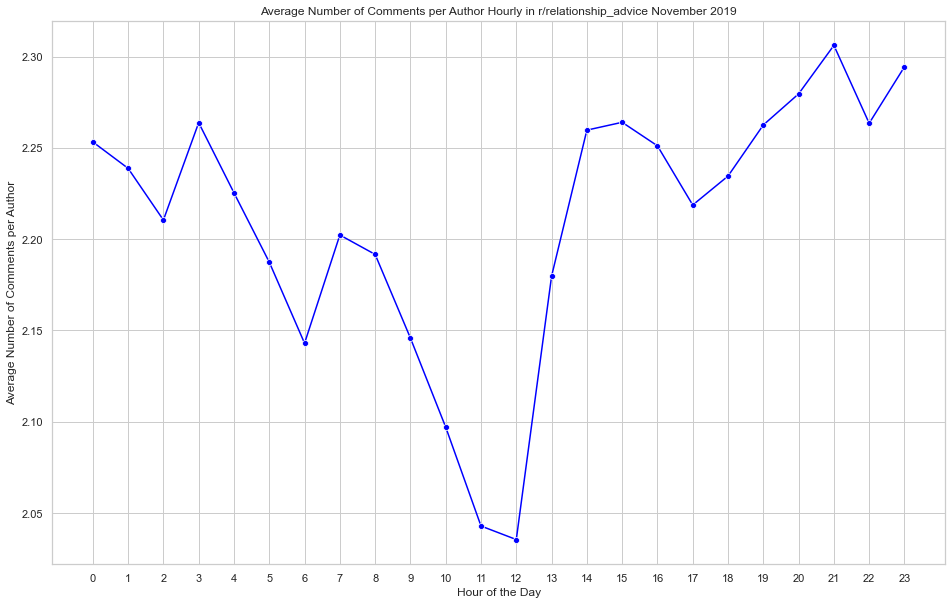

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each hour
avg_comments_per_author_hourly = df.groupby(['created_hour', 'author']).size().groupby('created_hour').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_hourly, x='created_hour', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Hourly in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(24))  # Show all hour values
plt.show()


# The average number of comments per author per day

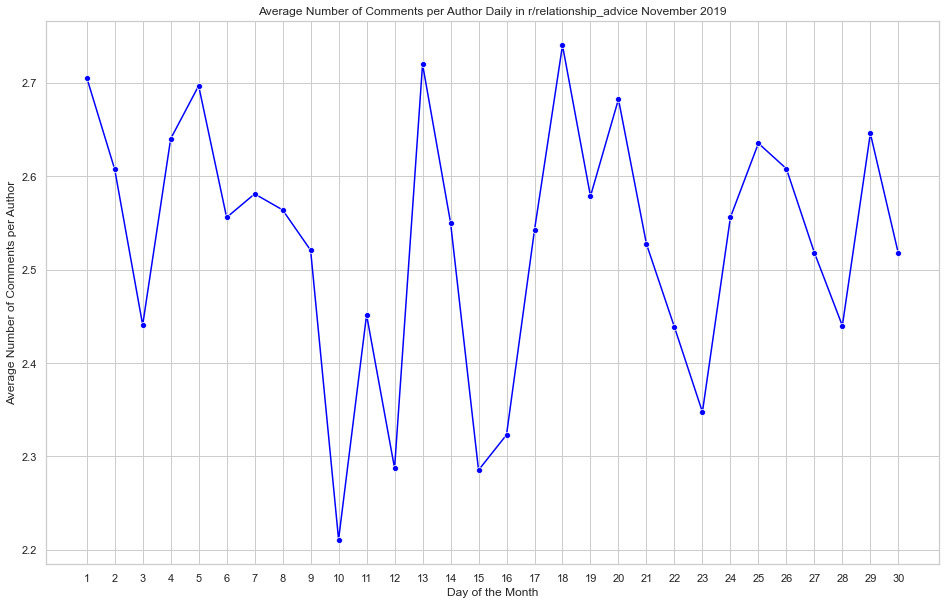

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each day of the week
avg_comments_per_author_daily = df.groupby(['created_day', 'author']).size().groupby('created_day').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_daily, x='created_day', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Daily in r/relationship_advice November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(1, 31))  # Show all day values
plt.show()


# Number of comments per hour

([<matplotlib.axis.XTick at 0x7f7ad4ece760>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

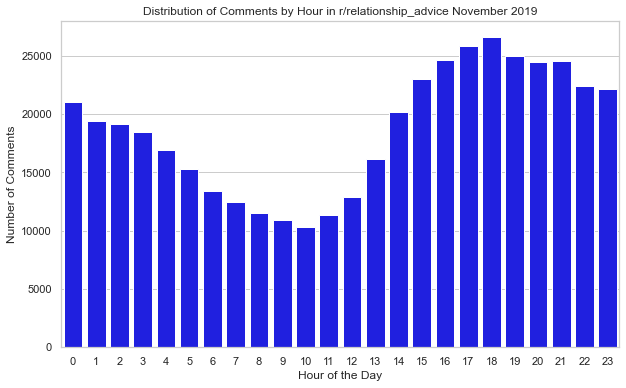

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column
# df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Create the Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Distribution of Comments by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(range(24))  # Set x-axis to hours


# Number of comments per day

Text(0, 0.5, 'Number of Comments')

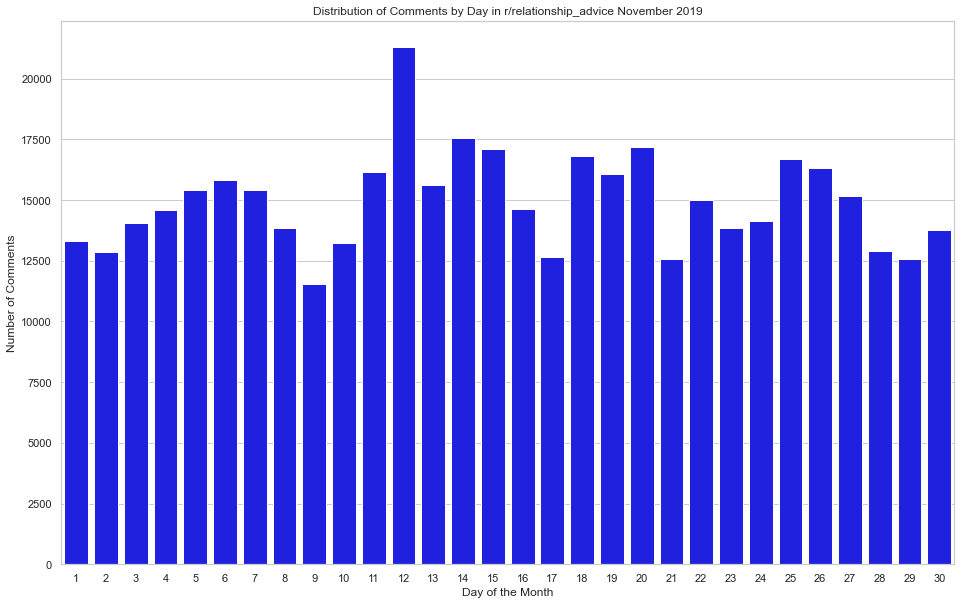

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column

# Create the Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Distribution of Comments by Day in r/relationship_advice November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Comments')


# How many comments are Edited

In [21]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    438035
True      10075
Name: edited, dtype: int64


Text(0, 0.5, '')

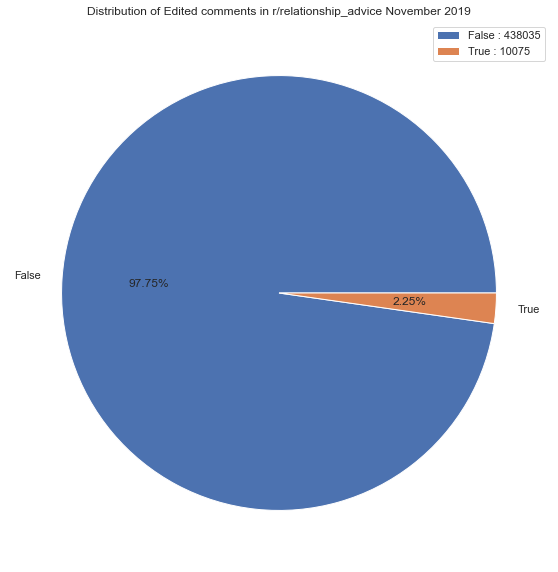

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df['edited'].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of Edited comments in r/relationship_advice November 2019")
plt.ylabel('')  # Remove y-axis label for clarity


# Score Analysis

In [23]:
df["score"].mean()

9.789803842806453

In [24]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

author  Toxicity  Severe Toxicity  Profanity  Identity Attack  \
214471  jillbowaggins  0.398421         0.023077   0.167760         0.095764   
214460    Flarebear99  0.854047         0.349583   0.818640         0.179253   
226772       Shanashy  0.140825         0.003242   0.024609         0.006512   
123022   motosandguns  0.770145         0.169603   0.708646         0.026610   
359978  PM_UR_FELINES  0.024260         0.001173   0.015250         0.005846   
368917      dalekosam  0.386017         0.023077   0.409803         0.043582   
342959    Dominoodles  0.203122         0.009575   0.092280         0.013446   
358687      [deleted]  0.522726         0.169603   0.241479         0.035074   
324515       trextine  0.079251         0.001469   0.017026         0.002904   
122972      zenfrog80  0.259157         0.006943   0.103639         0.010359   

          Insult    Threat author_flair_text  \
214471  0.108797  0.441748  Early 30s Female   
214460  0.569973  0.131614                 0   
226772  0.041494  0.009023                 0   
123022  0.425680  0.016120                 0   
359978  0.008995  0.007249                 0   
368917  0.237046  0.011923                 0   
342959  0.035884  0.049775                 0   
358687  0.092704  0.601458                 0   
324515  0.031697  0.006058                 0   
122972  0.076819  0.009567                 0   

                                                     body  controversiality  \
214471                 Time to delete the whole boyfriend             False   
214460  That sounds like some psychopathic shit. Huge ...             False   
226772  "Dan, the way you acted towards me when we wer...             False   
123022  You don’t know if it was intentional? He shove...             False   
359978                Adults don’t do this to each other.             False   
368917  He's not crossing a line because he has a clos...             False   
342959  - Didn't stop when you said no - Didn't stop w...             False   
358687  I'm gonna take a shot in the dark and guess th...             False   
324515  Also the only person who knows what is best fo...             False   
122972    This is horrible behavior. Yes it’s intentional             False   

        ...   parent_id  score  stickied  created_hour created_day  \
214471  ...   t3_dwmlki  23396     False             6          15   
214460  ...   t3_dwmlki  17029     False             6          15   
226772  ...   t3_dwwpsc  15010     False            22          15   
123022  ...   t3_dtynnb  14207     False            17           9   
359978  ...  t1_f8mho0s  12177     False            23          24   
368917  ...   t3_e1g15i  11585     False            14          25   
342959  ...   t3_e0khbs  10092     False            18          23   
358687  ...   t3_e12ftl   9851     False            21          24   
324515  ...   t3_e025s8   9766     False            15          22   
122972  ...   t3_dtynnb   9735     False            17           9   

       created_year                                         clean_text  \
214471         2019                 Time to delete the whole boyfriend   
214460         2019  That sounds like some psychopathic shit . Huge...   
226772         2019  Dan the way you acted towards me when we were ...   
123022         2019  You don t know if it was intentional He shoved...   
359978         2019               Adults don t do this to each other .   
368917         2019  He s not crossing a line because he has a clos...   
342959         2019  Didn t stop when you said no Didn t stop when ...   
358687         2019  I m gon na take a shot in the dark and guess t...   
324515         2019  Also the only person who knows what is best fo...   
122972         2019   This is horrible behavior . Yes it s intentional   

        comment_len  compound  Sentiment  
214471            6    0.0000          0  
214460           18   -0.2263         -1  
226772           39 

In [25]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

author  Toxicity  Severe Toxicity  Profanity  \
23912         NumerousFront  0.056759         0.002098   0.021330   
445260  Hike_bike_fish_love  0.811563         0.349544   0.808675   
19245          ThrowRA29837  0.110783         0.003128   0.051933   
54853             [deleted]  0.377512         0.021032   0.266488   
188235        ThrowRaAmelia  0.040926         0.001230   0.021398   
361569           RareLemons  0.338998         0.017610   0.212407   
418685            [deleted]  0.478864         0.023077   0.419364   
276847      cruisesaintcool  0.069754         0.003948   0.065460   
148078           JohnDuLion  0.018849         0.000930   0.013849   
248675       ishitinthemilk  0.309935         0.014641   0.189098   

        Identity Attack    Insult    Threat author_flair_text  \
23912          0.003459  0.014163  0.012544                 0   
445260         0.031980  0.423678  0.023717                 0   
19245          0.012240  0.028282  0.007961                 0   
54853          0.072602  0.343922  0.011871                 0   
188235         0.003034  0.016481  0.007534                 0   
361569         0.021987  0.173619  0.014048                 0   
418685         0.023997  0.423678  0.008415                 0   
276847         0.008916  0.020902  0.011146                 0   
148078         0.004884  0.009052  0.006758    Early 30s Male   
248675         0.012441  0.071433  0.348043                 0   

                                                     body  controversiality  \
23912                   How can I make him stop doing it?             False   
445260  Fuck yeah! Leave and find a doormat that will ...             False   
19245   I don't understand how scars can ever be attra...             False   
54853   not only that but if you give an addict ANYTHI...             False   
188235  I understand what you're saying but he did mak...             False   
361569  LMAO "abusive relationship" He's just being ch...             False   
418685  because that's called being an adult with chil...             False   
276847  We're still gonna go through the itinerary tog...             False   
148078                  Technically they're not siblings.             False   
248675  If my partner was insanely upset about me stay...             False   

        ...   parent_id score  stickied  created_hour created_day  \
23912   ...  t1_f68brf1  -473     False            20           2   
445260  ...  t1_f95vw8k  -424     False            20          30   
19245   ...  t1_f65l9gi  -422     False            14           2   
54853   ...  t1_f6kd9e9  -410     False             0           5   
188235  ...  t1_f7f1wv8  -375     False            18          13   
361569  ...  t1_f8lyoqc  -365     False             0          25   
418685  ...  t1_f8zt78f  -335     False            19          28   
276847  ...  t1_f8155ta  -323     False             8          19   
148078  ...  t1_f781jra  -302     False            14          11   
248675  ...  t1_f7tazqi  -295     False            16          17   

       created_year                                         clean_text  \
23912          2019                   How can I make him stop doing it   
445260         2019  Fuck yeah Leave and find a doormat that will p...   
19245          2019  I don t understand how scars can ever be attra...   
54853          2019  not only that but if you give an addict ANYTHI...   
188235         2019  I understand what you re saying but he did mak...   
361569         2019  LMAO abusive relationship He s just being chil...   
418685         2019  because that s called being an adult with chil...   
276847         2019  We re still gon na go through the itinerary to...   
148078         2019                 Technically they re not siblings .   
248675         2019  If my partner was insanely upset about me stay...   

        comment_len  compound  Sentiment  
23912             8   -0.2960         -1  
445260        

# On which hour the scores are the highes or lowest

Text(0, 0.5, 'Average Score')

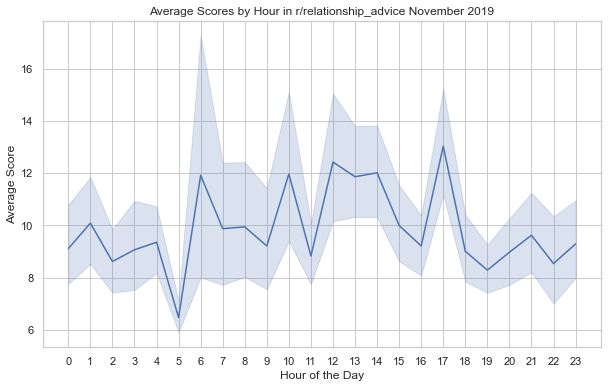

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')




([<matplotlib.axis.XTick at 0x7f7a802a20d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

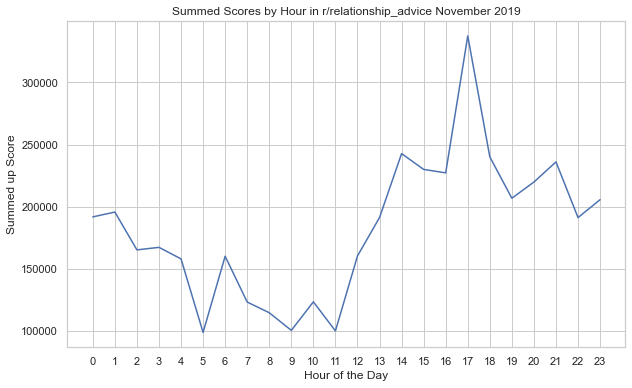

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="score")

plt.title('Summed Scores by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Score')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an



# On which day the scores are the highes or lowest

Text(0, 0.5, 'Average Score')

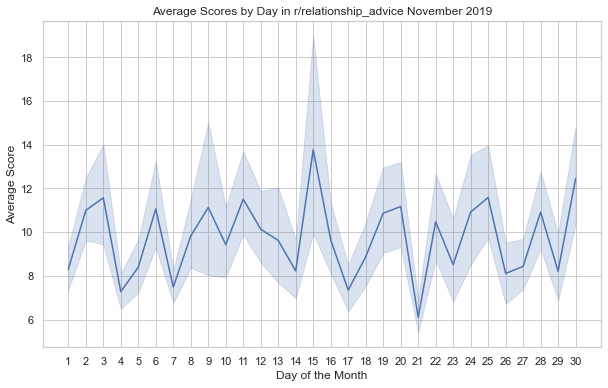

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationship_advice November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

([<matplotlib.axis.XTick at 0x7f7ae0d8d610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

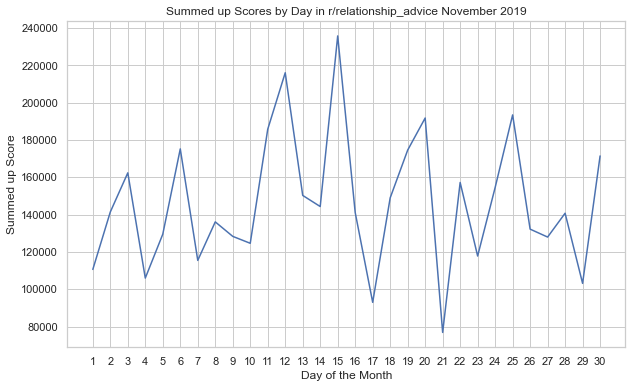

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="score")

plt.title('Summed up Scores by Day in r/relationship_advice November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

# Which Author have the most scores

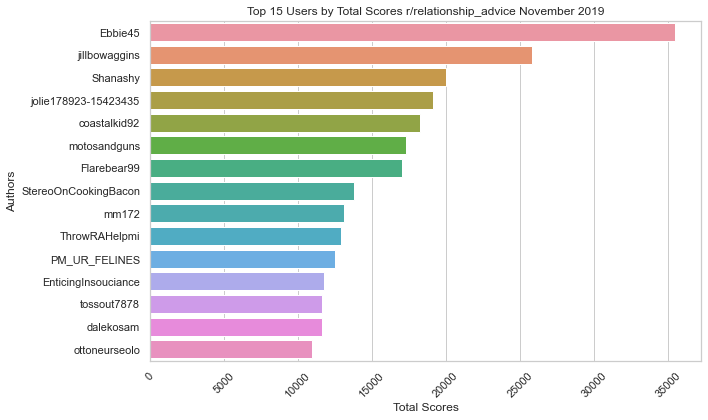

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with the corresponding columns
# Make sure to use the same DataFrame name

# Group authors by total scores
author_scores = df.groupby('author')['score'].sum()

# Sort authors by total scores in descending order
sorted_authors = author_scores.sort_values(ascending=False)

# Remove the first author from the sorted list
sorted_authors = sorted_authors.iloc[2:]

# Select the top 15 authors
top_authors = sorted_authors.head(15)

# Create a plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Users by Total Scores r/relationship_advice November 2019')
plt.xlabel("Total Scores")
plt.ylabel("Authors")
plt.xticks(rotation=45)
plt.tight_layout()


# Sind Leute die mehr Edited mehr negative?

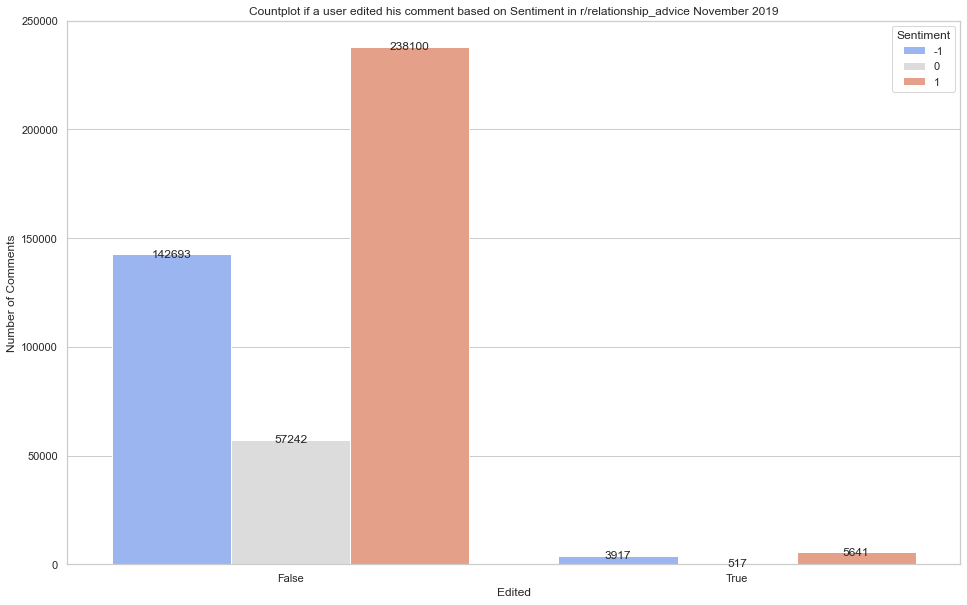

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='edited', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if a user edited his comment based on Sentiment in r/relationship_advice November 2019')
plt.xlabel('Edited')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

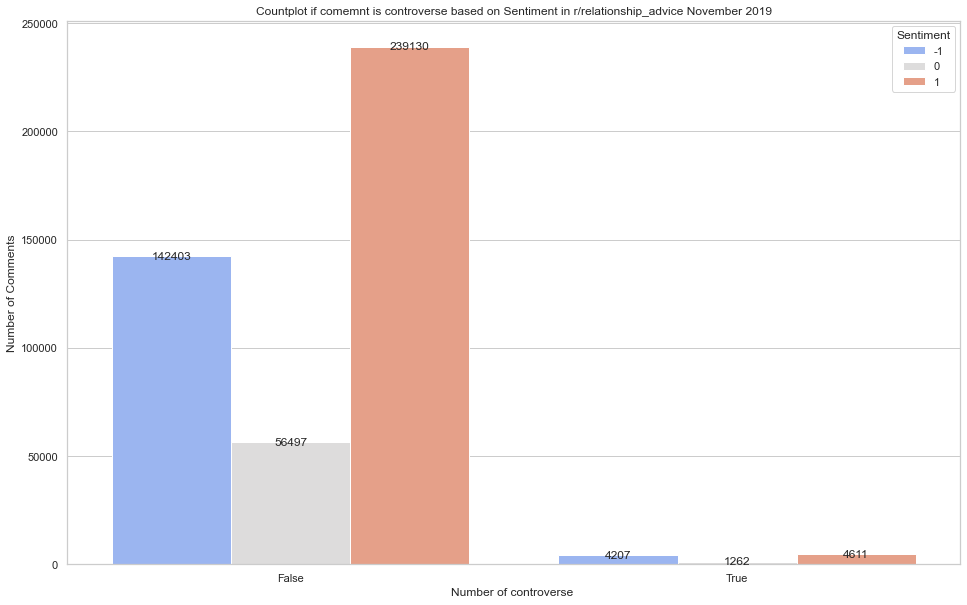

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='controversiality', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if comemnt is controverse based on Sentiment in r/relationship_advice November 2019')
plt.xlabel('Number of controverse ')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

# Sentiment  Analyses

# Durchschnittliche Vader Sentiment score für 2019

In [33]:
df["compound"].mean()

0.16001751802010775

# Vader Sentiment coutplot

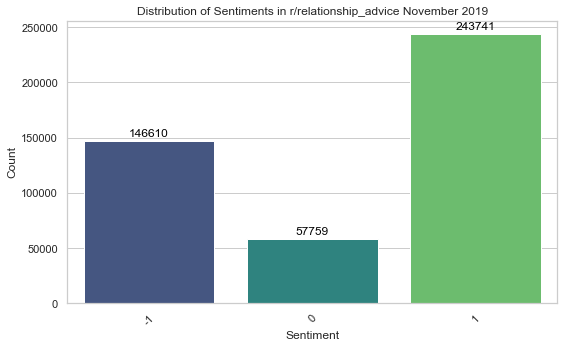

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in r/relationship_advice November 2019')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()


# Prozentuale Verteilung von Vader Sentiment

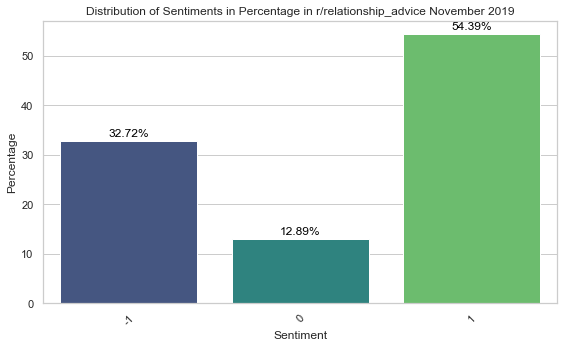

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage in r/relationship_advice November 2019')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()

# Verteilung des Compound scores

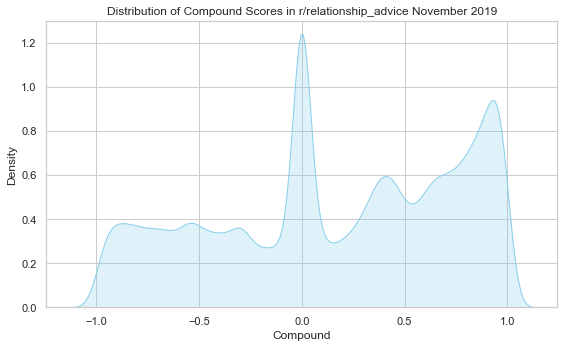

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores in r/relationship_advice November 2019')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()

# An welchen Tag sind die Kommentare durchschnittlich am negativsten bzw positivesten

([<matplotlib.axis.XTick at 0x7f7ac22e1280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

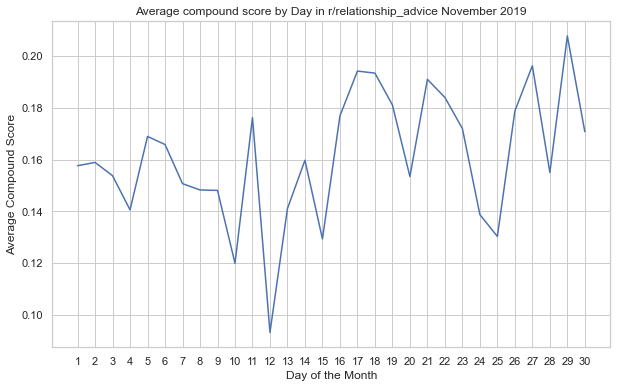

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="compound")

plt.title('Average compound score by Day in r/relationship_advice November 2019')
plt.xlabel('Day of the Month')
plt.ylabel('Average Compound Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

# An welcher stunde sind die Kommentare im durchschnitt am negativsten oder positivsten

([<matplotlib.axis.XTick at 0x7f7aa290f310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

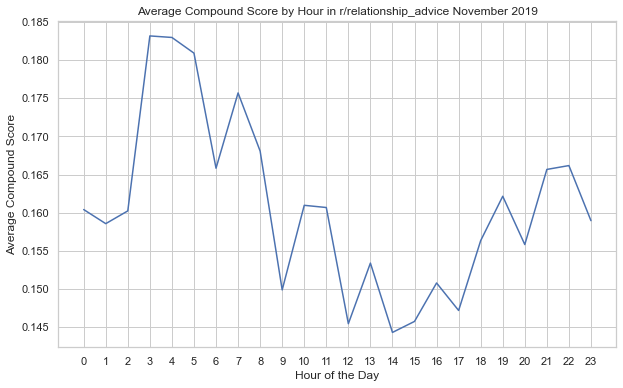

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="compound")

plt.title('Average Compound Score by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel("Average Compound Score")
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

# Zu welcher Zeit haben negative, positive und neutrale kommentare im Durchschnitt den höchsten scoren

Text(0, 0.5, 'Average Score')

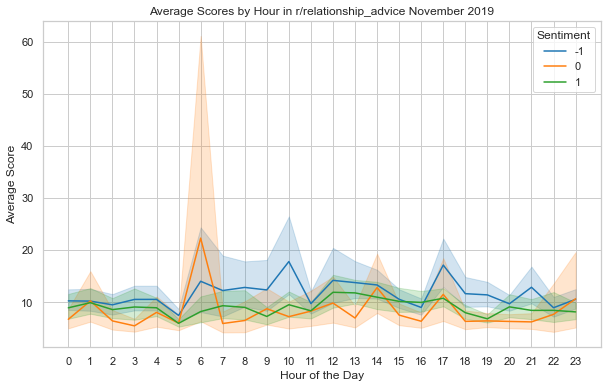

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')

Text(0, 0.5, 'Average Score')

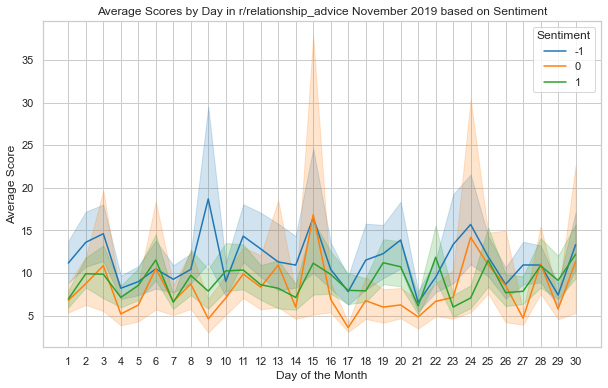

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationship_advice November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')


Text(0, 0.5, 'Average Score')

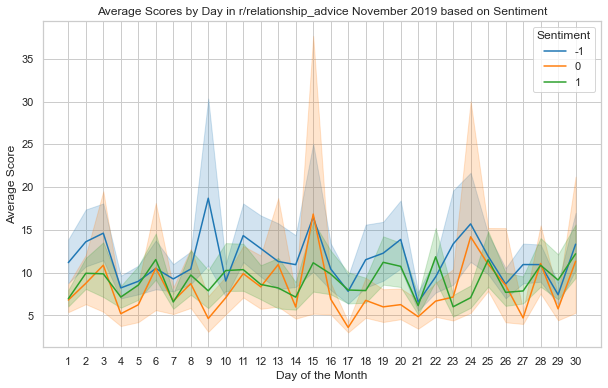

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationship_advice November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

Text(0, 0.5, 'Summed up Score')

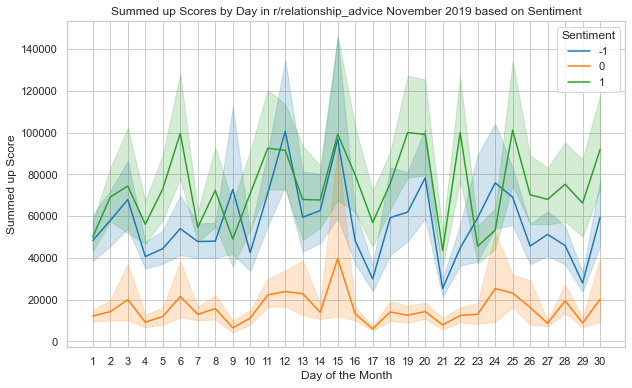

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="score", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up Scores by Day in r/relationship_advice November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')

<AxesSubplot:xlabel='Sentiment', ylabel='score'>

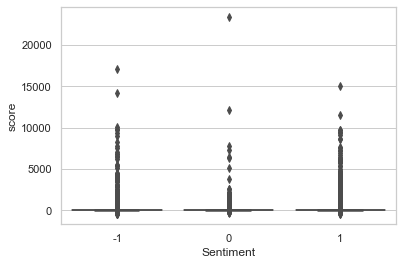

In [43]:
sns.boxplot(data=df, y="score", x="Sentiment")

<AxesSubplot:xlabel='Sentiment', ylabel='comment_len'>

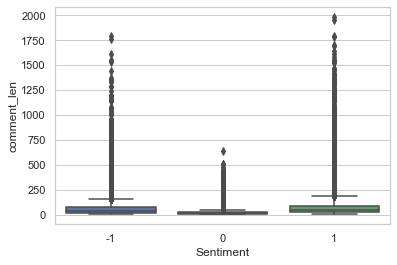

In [44]:
sns.boxplot(data=df, y="comment_len", x="Sentiment")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448110 entries, 0 to 448109
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             448110 non-null  object 
 1   Toxicity           439265 non-null  float64
 2   Severe Toxicity    439265 non-null  float64
 3   Profanity          439265 non-null  float64
 4   Identity Attack    439265 non-null  float64
 5   Insult             439265 non-null  float64
 6   Threat             439265 non-null  float64
 7   author_flair_text  448110 non-null  object 
 8   body               448110 non-null  object 
 9   controversiality   448110 non-null  bool   
 10  created_utc        448110 non-null  object 
 11  distinguished      448110 non-null  object 
 12  edited             448110 non-null  bool   
 13  gilded             448110 non-null  int64  
 14  id                 448110 non-null  object 
 15  link_id            448110 non-null  object 
 16  pa

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448110 entries, 0 to 448109
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             448110 non-null  object 
 1   Toxicity           439265 non-null  float64
 2   Severe Toxicity    439265 non-null  float64
 3   Profanity          439265 non-null  float64
 4   Identity Attack    439265 non-null  float64
 5   Insult             439265 non-null  float64
 6   Threat             439265 non-null  float64
 7   author_flair_text  448110 non-null  object 
 8   body               448110 non-null  object 
 9   controversiality   448110 non-null  bool   
 10  created_utc        448110 non-null  object 
 11  distinguished      448110 non-null  object 
 12  edited             448110 non-null  bool   
 13  gilded             448110 non-null  int64  
 14  id                 448110 non-null  object 
 15  link_id            448110 non-null  object 
 16  pa

# Comment lengt

In [47]:
df["comment_len"].mean()

58.22235388632255

In [48]:
df["comment_len"].median()

37.0

([<matplotlib.axis.XTick at 0x7f7ac22dd400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

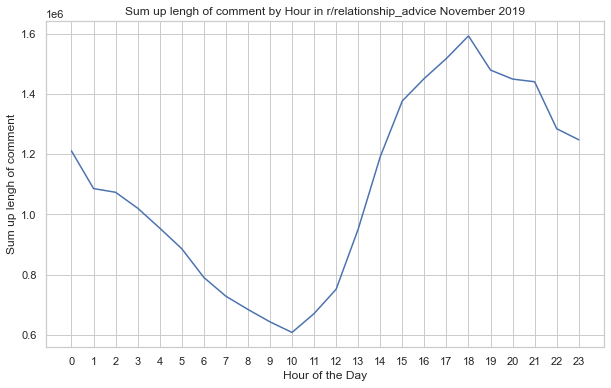

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Sum up lengh of comment by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum up lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

([<matplotlib.axis.XTick at 0x7f7ae09a7910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

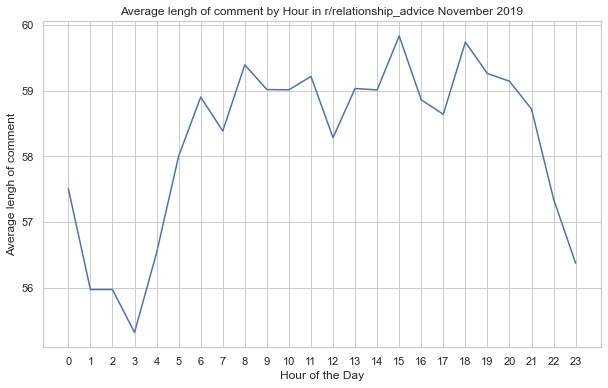

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Average lengh of comment by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

Text(0, 0.5, 'Average Comment Length')

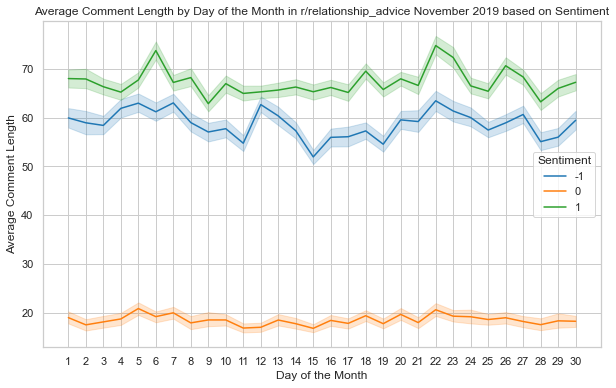

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all day values

plt.title('Average Comment Length by Day of the Month in r/relationship_advice November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Comment Length')



Text(0, 0.5, 'Average Comment Length')

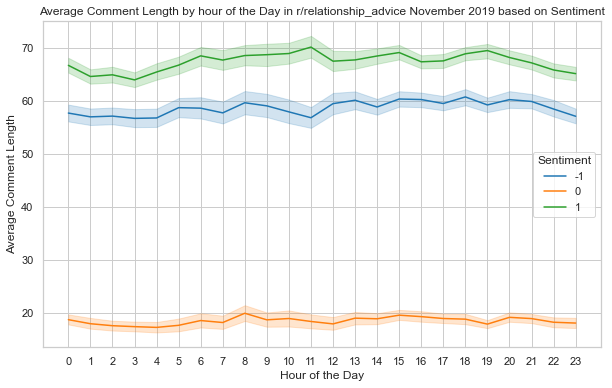

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all day values

plt.title('Average Comment Length by hour of the Day in r/relationship_advice November 2019 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Comment Length')

Text(0, 0.5, 'Summed up Comment length')

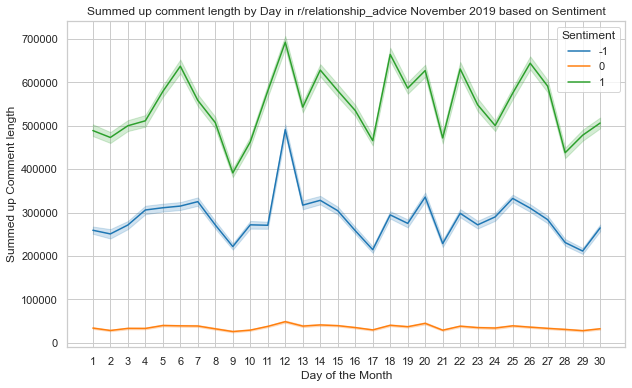

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up comment length by Day in r/relationship_advice November 2019 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

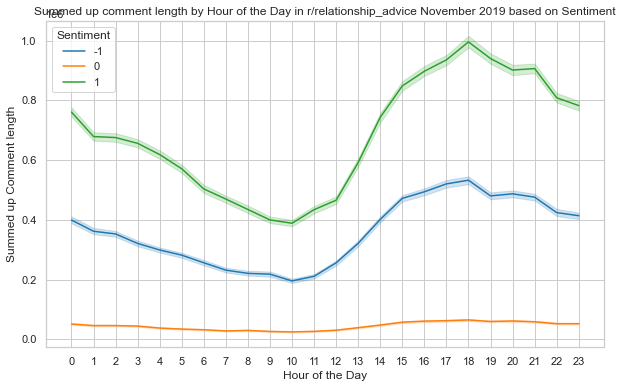

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment length by Hour of the Day in r/relationship_advice November 2019 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

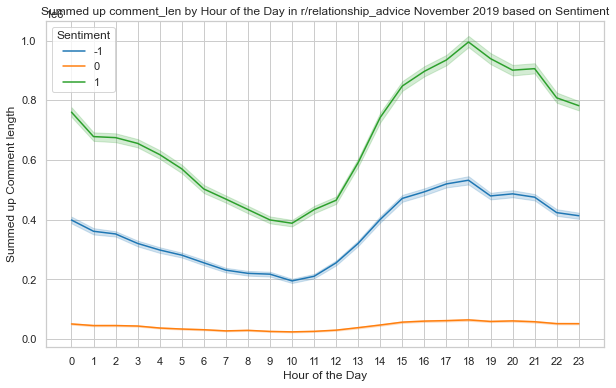

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment_len by Hour of the Day in r/relationship_advice November 2019 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

# Toxicity 

In [56]:
import pandas as pd

# Annahme: DataFrame df enthält die Spalten "comment_len", "compound" und "Toxicity"

# Filtere die Zeilen, in denen "Toxicity" keinen Wert hat
filtered_df = df[df['Toxicity'].isnull()]

# Berechne den Durchschnitt von "comment_len" und "compound" für die gefilterten Zeilen
mean_comment_len = filtered_df['comment_len'].mean()
mean_compound_score = filtered_df['compound'].mean()

print(f'Mean Comment Length (where Toxicity is null): {mean_comment_len}')
print(f'Mean Compound Score (where Toxicity is null): {mean_compound_score}')


Mean Comment Length (where Toxicity is null): 3.6902204635387226
Mean Compound Score (where Toxicity is null): 0.10470693046919151


Text(0, 0.5, 'Count')

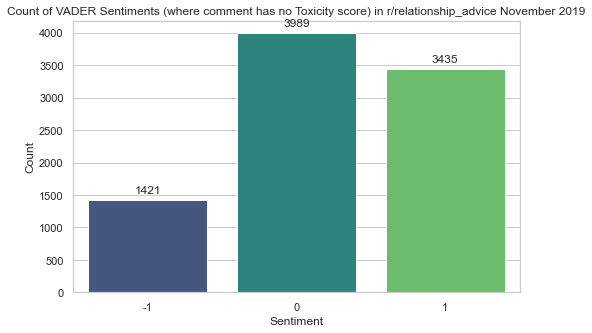

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "sentiment"

# Erstelle das Countplot für die Spalte "sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den genauen Zahlen
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of VADER Sentiments (where comment has no Toxicity score) in r/relationship_advice November 2019')
plt.xlabel('Sentiment')
plt.ylabel('Count')





Text(0, 0.5, 'Percentage')

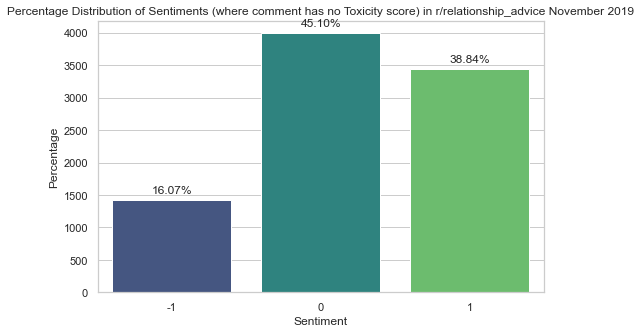

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "Sentiment"

# Berechne die prozentualen Anteile für jeden Sentiment-Wert
total_count = len(filtered_df)
percentages = (filtered_df['Sentiment'].value_counts() / total_count) * 100

# Erstelle das Countplot für die Spalte "Sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den prozentualen Anteilen
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total_count * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Percentage Distribution of Sentiments (where comment has no Toxicity score) in r/relationship_advice November 2019')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')




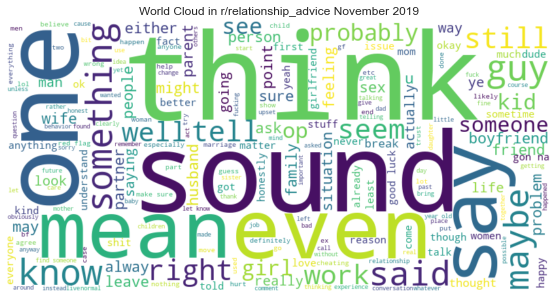

Text(0, 0.5, 'Count')

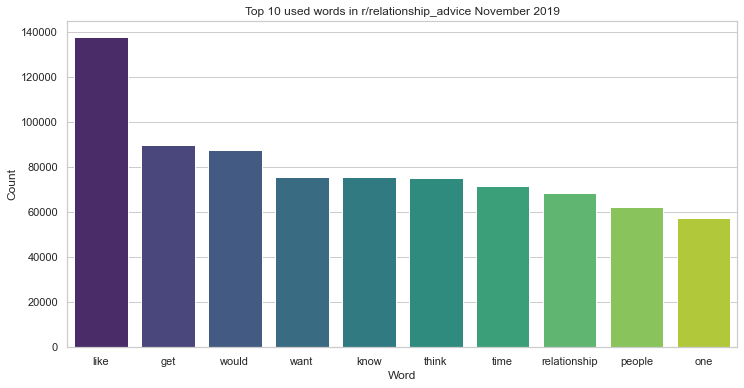

In [59]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns

# Assuming you already have a DataFrame named "df" with a column named "body"
# Make sure that nltk, wordcloud, seaborn, and matplotlib are installed
# Install them with: pip install nltk wordcloud seaborn matplotlib

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Combine all texts in the "body" column into a single text and remove stopwords
df["body_clean"] = df["clean_text"].apply(lambda x: " ".join([word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words]))

# Combine all cleaned texts into a single text
text = " ".join(df["body_clean"])

# Create the Word Cloud using the WordCloud library
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.title("World Cloud in r/relationship_advice November 2019")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Create a Countplot for the Top 10 words
top_words = Counter(text.split()).most_common(10)
top_words_df = pd.DataFrame(top_words, columns=["Word", "Count"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Count", data=top_words_df, palette="viridis")
plt.title("Top 10 used words in r/relationship_advice November 2019")
plt.xlabel("Word")
plt.ylabel("Count")



# Toxicity Analyses

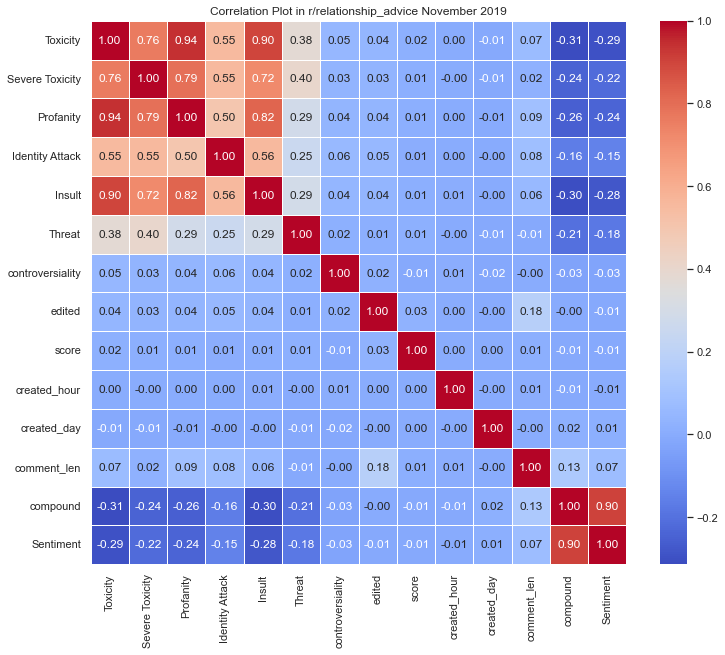

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: df ist dein DataFrame

# Entferne die Spalten created_year, created_hour, und created_day
columns_to_exclude = ['created_year',"gilded","author_flair_text","distinguished","stickied"]
df_filtered = df.drop(columns=columns_to_exclude, errors='ignore')

# Berechne die Korrelationsmatrix
correlation_matrix = df_filtered.corr()

# Erstelle den Korrelationsplot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Plot in r/relationship_advice November 2019')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448110 entries, 0 to 448109
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             448110 non-null  object 
 1   Toxicity           439265 non-null  float64
 2   Severe Toxicity    439265 non-null  float64
 3   Profanity          439265 non-null  float64
 4   Identity Attack    439265 non-null  float64
 5   Insult             439265 non-null  float64
 6   Threat             439265 non-null  float64
 7   author_flair_text  448110 non-null  object 
 8   body               448110 non-null  object 
 9   controversiality   448110 non-null  bool   
 10  created_utc        448110 non-null  object 
 11  distinguished      448110 non-null  object 
 12  edited             448110 non-null  bool   
 13  gilded             448110 non-null  int64  
 14  id                 448110 non-null  object 
 15  link_id            448110 non-null  object 
 16  pa

In [62]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
df['Toxicity_0.7_or_higher'] = (df['Toxicity'] >= 0.7).astype(int)
df['Severe_Toxicity_0.7_or_higher'] = (df['Severe Toxicity'] >= 0.7).astype(int)
df['Profanity_0.7_or_higher'] = (df['Profanity'] >= 0.7).astype(int)
df['Identity_Attack_0.7_or_higher'] = (df['Identity Attack'] >= 0.7).astype(int)
df['Insult_0.7_or_higher'] = (df['Insult'] >= 0.7).astype(int)
df['Threat_0.7_or_higher'] = (df['Threat'] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
count_toxicity = df['Toxicity_0.7_or_higher'].sum()
count_severe_toxicity = df['Severe_Toxicity_0.7_or_higher'].sum()
count_profanity = df['Profanity_0.7_or_higher'].sum()
count_identity_attack = df['Identity_Attack_0.7_or_higher'].sum()
count_insult = df['Insult_0.7_or_higher'].sum()
count_threat = df['Threat_0.7_or_higher'].sum()

# Drucke die Ergebnisse
print(f'Count of Toxicity >= 0.7: {count_toxicity}')
print(f'Count of Severe Toxicity >= 0.7: {count_severe_toxicity}')
print(f'Count of Profanity >= 0.7: {count_profanity}')
print(f'Count of Identity Attack >= 0.7: {count_identity_attack}')
print(f'Count of Insult >= 0.7: {count_insult}')
print(f'Count of Threat >= 0.7: {count_threat}')


Count of Toxicity >= 0.7: 25991
Count of Severe Toxicity >= 0.7: 139
Count of Profanity >= 0.7: 23836
Count of Identity Attack >= 0.7: 85
Count of Insult >= 0.7: 4869
Count of Threat >= 0.7: 82


In [63]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
for col in selected_columns:
    df[f'{col}_0.7_or_higher'] = (df[col] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
counts = df[[f'{col}_0.7_or_higher' for col in selected_columns]].sum()

# Berechne den Prozentsatz im Verhältnis zur Gesamtanzahl der Zeilen
total_rows = len(df)
percentages = counts / total_rows * 100

# Drucke die prozentualen Ergebnisse
for col, percentage in zip(selected_columns, percentages):
    print(f'Percentage of {col} >= 0.7: {percentage:.3f}%')


Percentage of Toxicity >= 0.7: 5.800%
Percentage of Severe Toxicity >= 0.7: 0.031%
Percentage of Profanity >= 0.7: 5.319%
Percentage of Identity Attack >= 0.7: 0.019%
Percentage of Insult >= 0.7: 1.087%
Percentage of Threat >= 0.7: 0.018%


Text(0, 0.5, 'Average Toxicity Score')

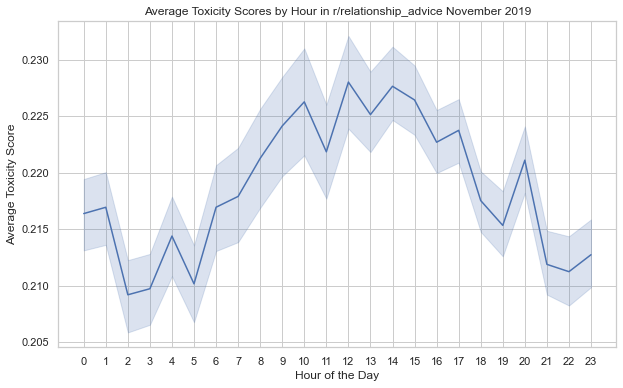

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Toxicity Score')

Text(0, 0.5, 'Average Toxicity Score')

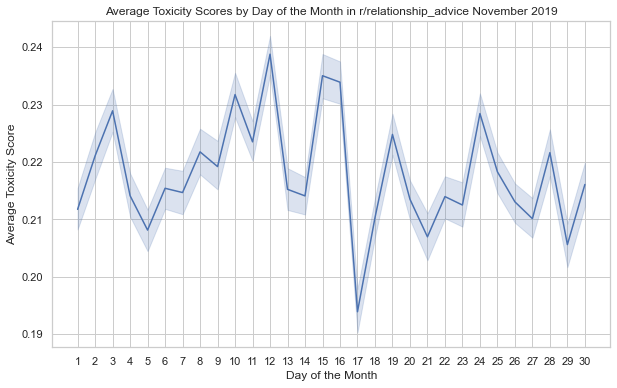

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Day of the Month in r/relationship_advice November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Toxicity Score')

# Severe Toxicity

Text(0, 0.5, 'Average Severe Toxicity Score')

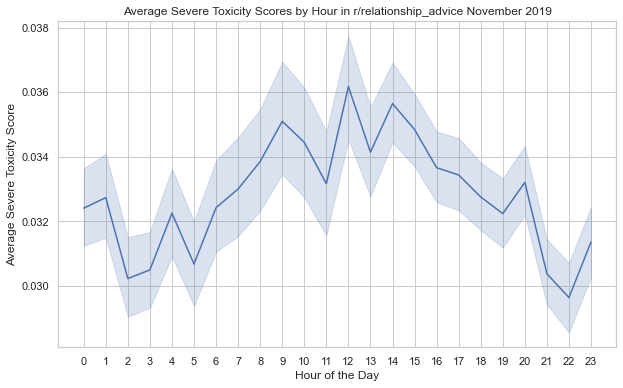

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Severe Toxicity Score')

Text(0, 0.5, 'Average Severe Toxicity Score')

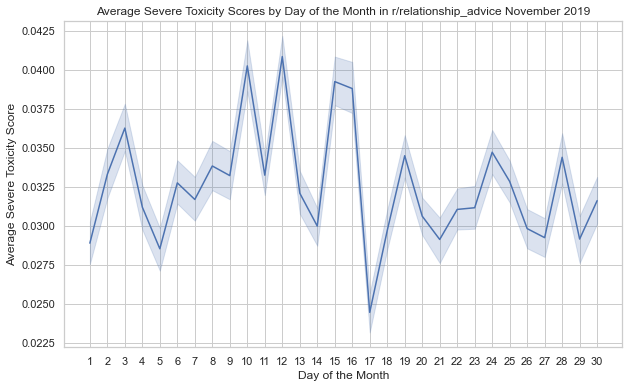

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Day of the Month in r/relationship_advice November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Severe Toxicity Score')

# Profanity

Text(0, 0.5, 'Average Profanity Score')

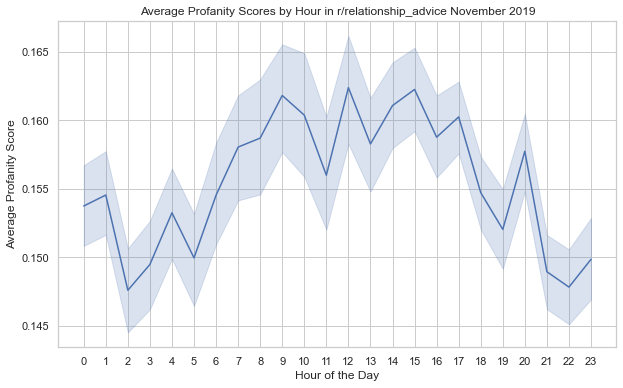

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Profanity Score')

Text(0, 0.5, 'Average Profanity Score')

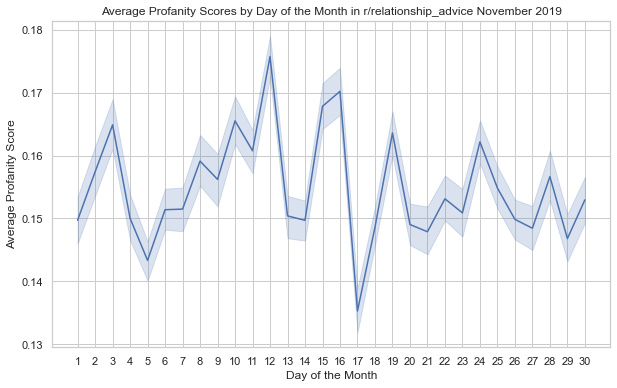

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Day of the Month in r/relationship_advice November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Profanity Score')

# Identity Attack

Text(0, 0.5, 'Average Identity Attack Score')

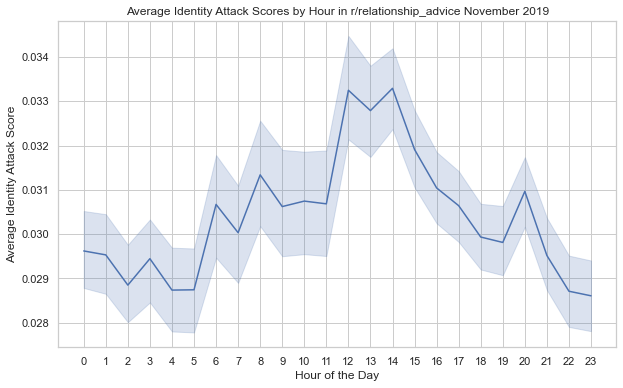

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Identity Attack Score')

Text(0, 0.5, 'Average Identity Attack Score')

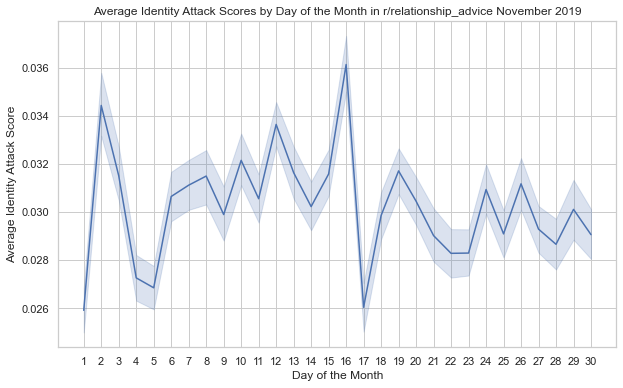

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Day of the Month in r/relationship_advice November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Identity Attack Score')

# Insult

Text(0, 0.5, 'Average Insult Score')

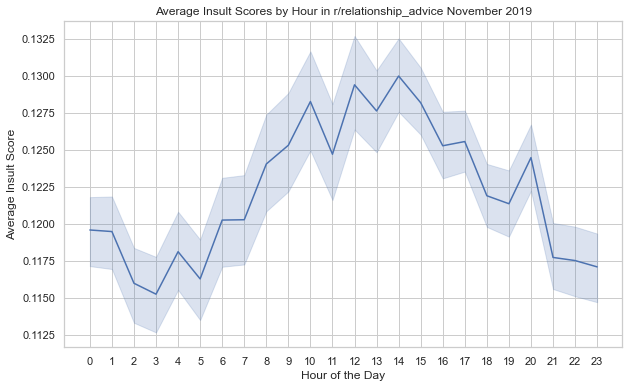

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Insult Score')

Text(0, 0.5, 'Average Insult Score')

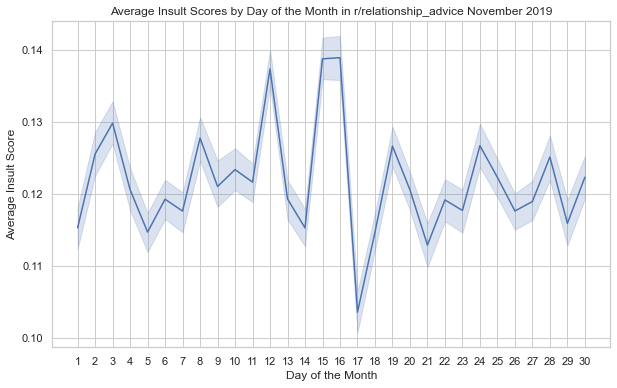

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Day of the Month in r/relationship_advice November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Insult Score')

# Threat

Text(0, 0.5, 'Average Threat Score')

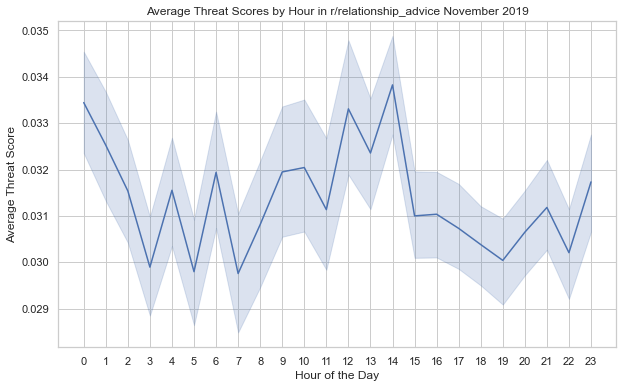

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Hour in r/relationship_advice November 2019')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Threat Score')

Text(0, 0.5, 'Average Threat Score')

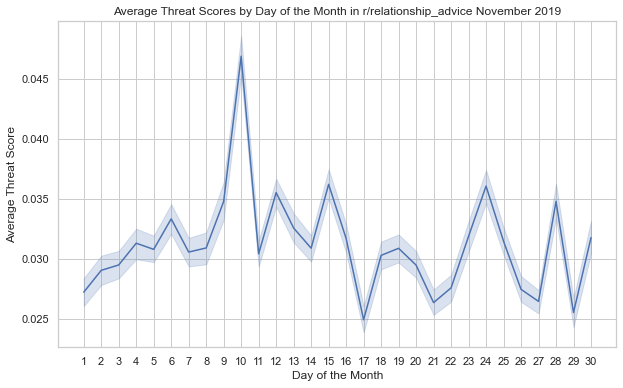

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Day of the Month in r/relationship_advice November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Threat Score')

# Summary

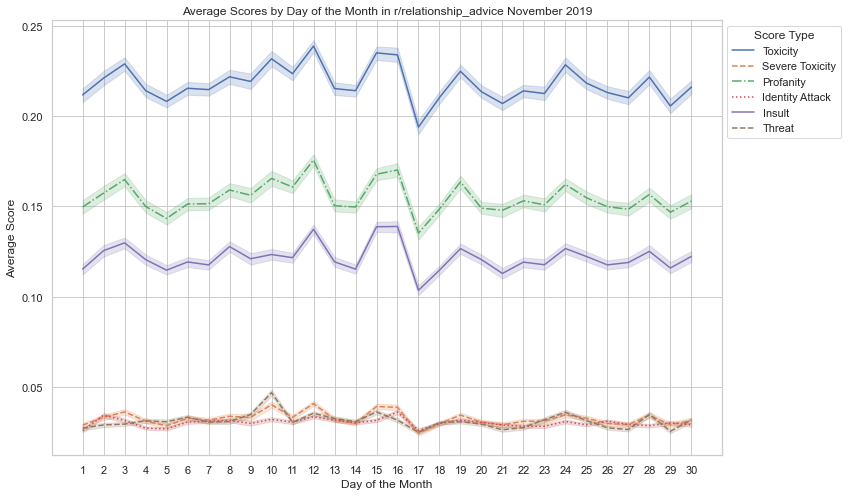

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_day", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_day", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_day", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_day", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_day", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_day", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day of the Month in r/relationship_advice November 2019')
plt.xlabel("Day of the Month")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


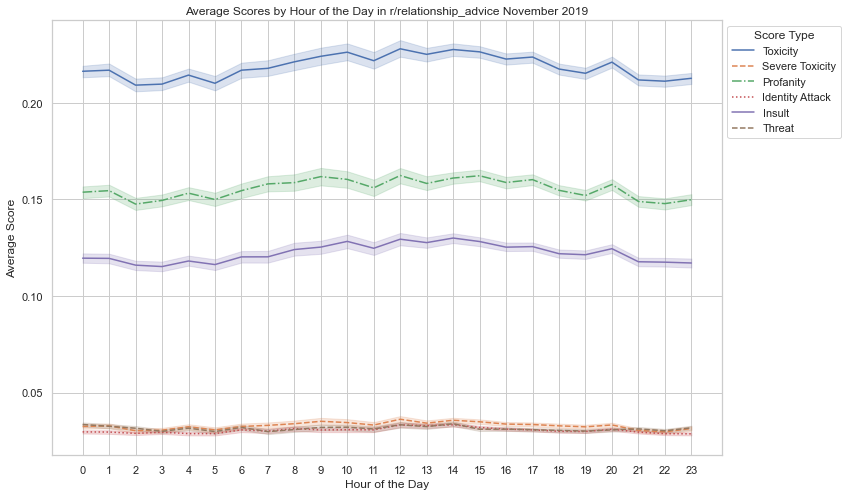

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_hour", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_hour", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_hour", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_hour", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_hour", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour of the Day in r/relationship_advice November 2019')
plt.xlabel("Hour of the Day")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))

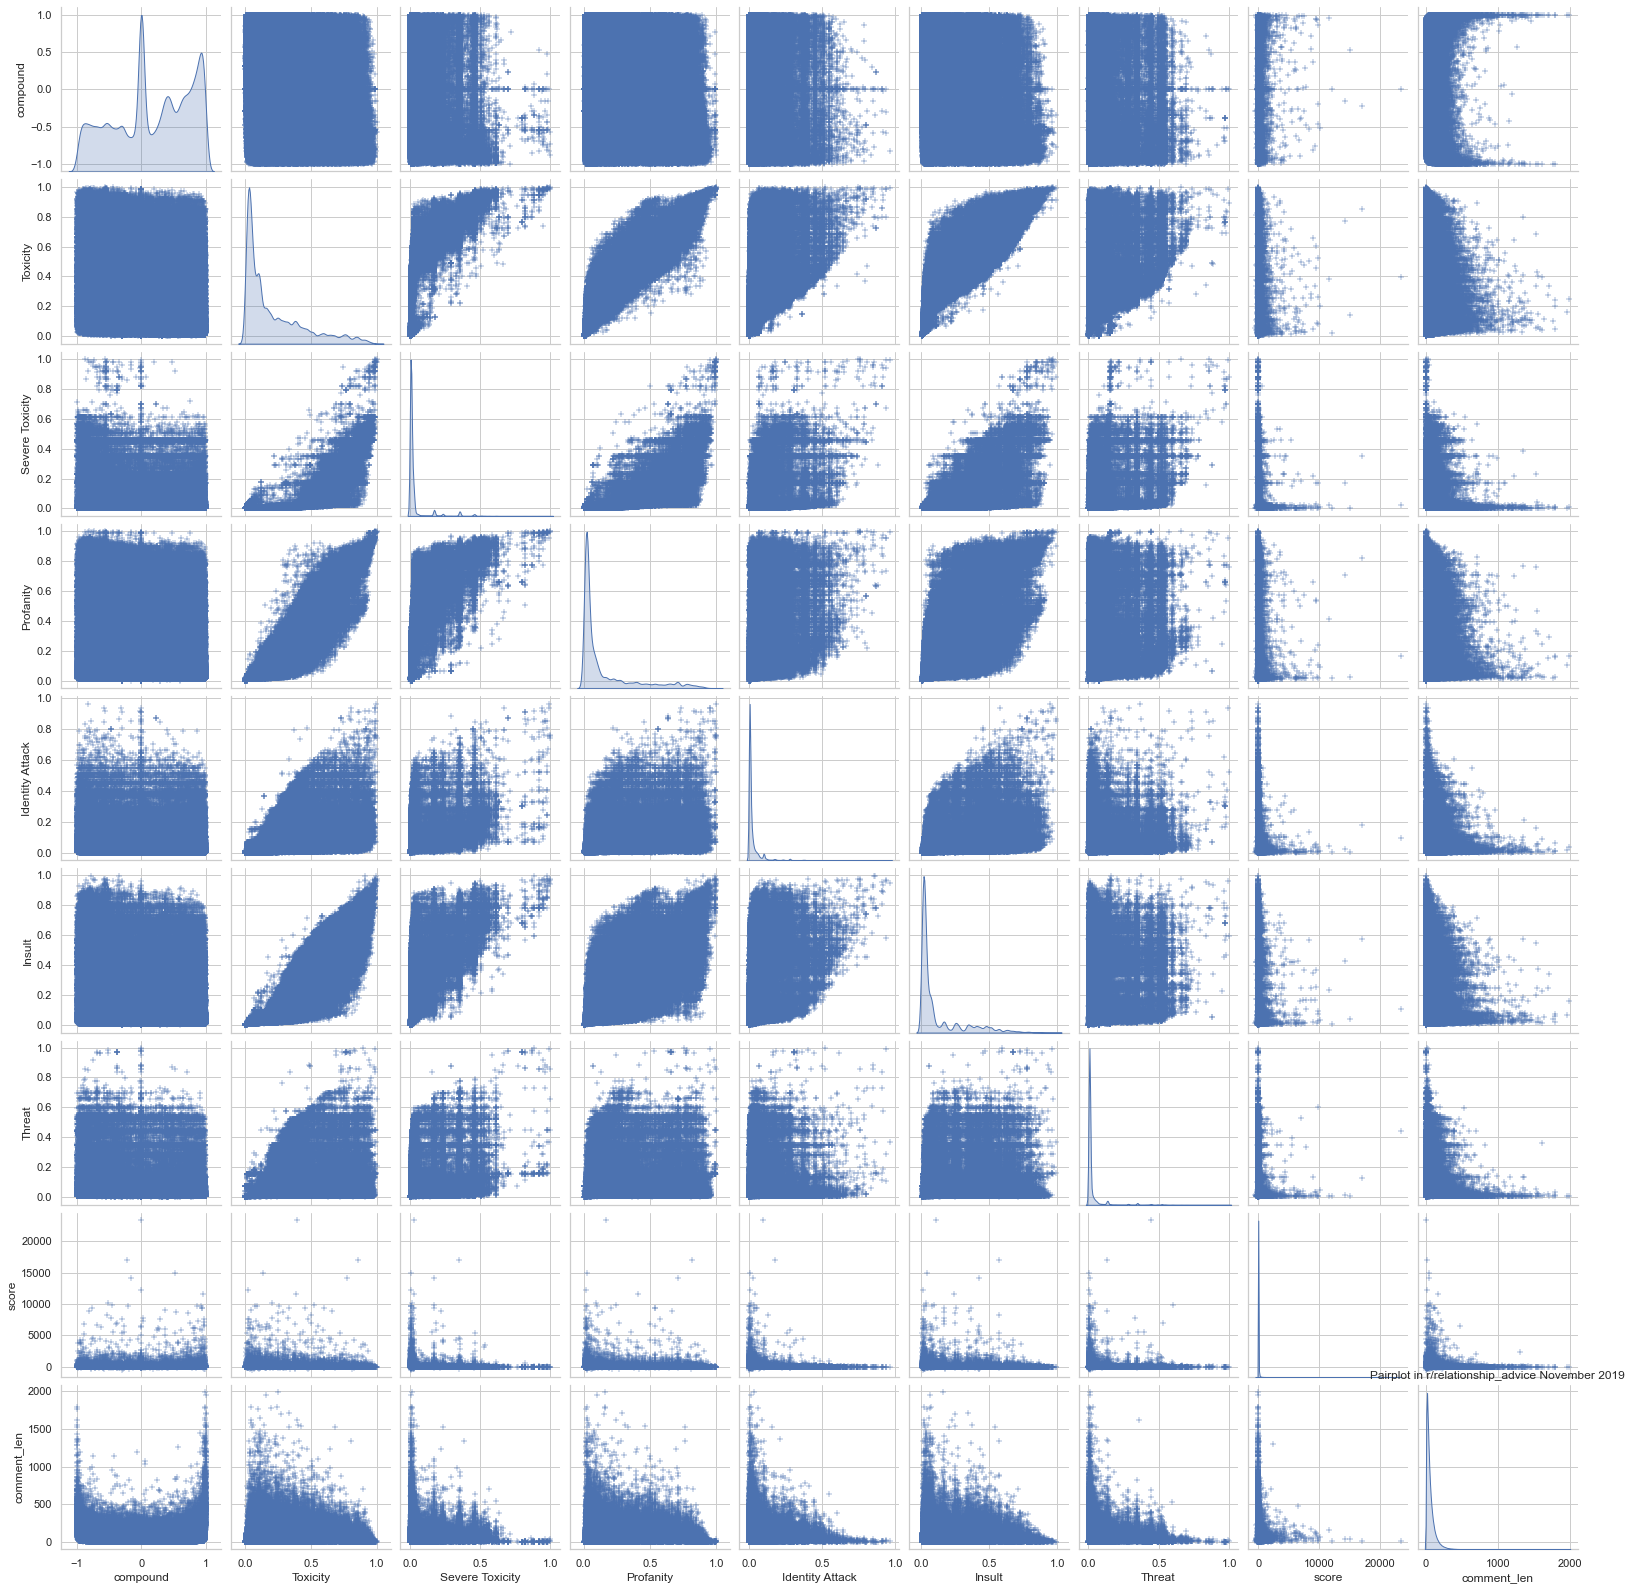

In [78]:
# Erstelle eine Pairplot-Matrix für ausgewählte Spalten
selected_columns = ['compound', 'Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat',"score","comment_len"]
sns.pairplot(df[selected_columns], diag_kind='kde', markers='+')
plt.title("Pairplot in r/relationship_advice November 2019")
plt.show()




# Submission based

# Nr of toxcix users

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448110 entries, 0 to 448109
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   author                         448110 non-null  object 
 1   Toxicity                       439265 non-null  float64
 2   Severe Toxicity                439265 non-null  float64
 3   Profanity                      439265 non-null  float64
 4   Identity Attack                439265 non-null  float64
 5   Insult                         439265 non-null  float64
 6   Threat                         439265 non-null  float64
 7   author_flair_text              448110 non-null  object 
 8   body                           448110 non-null  object 
 9   controversiality               448110 non-null  bool   
 10  created_utc                    448110 non-null  object 
 11  distinguished                  448110 non-null  object 
 12  edited                        

In [80]:
import pandas as pd

# Kategorien für die Berechnung
categories = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# DataFrame für die Ergebnisse erstellen
results_df = pd.DataFrame(columns=['Category', 'NumToxicUsers'])

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Ergebnisse zum DataFrame hinzufügen
    results_df = results_df.append({'Category': category, 'NumToxicUsers': num_toxic_users_category}, ignore_index=True)

# Ausgabe der Ergebnisse
print(results_df)





          Category NumToxicUsers
0         Toxicity          3642
1  Severe Toxicity            34
2        Profanity          3286
3  Identity Attack            21
4           Insult           722
5           Threat            18


In [81]:
# DataFrame für prozentuale Ergebnisse erstellen
percentage_results_df = pd.DataFrame(columns=['Category', 'PercentToxicUsers'])

# Gesamtanzahl der Benutzer
total_users = df['author'].nunique()

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Berechne den prozentualen Anteil toxischer Benutzer für die Kategorie
    percent_toxic_users_category = (num_toxic_users_category / total_users) * 100

    # Ergebnisse zum DataFrame hinzufügen
    percentage_results_df = percentage_results_df.append({'Category': category, 'PercentToxicUsers': percent_toxic_users_category}, ignore_index=True)

# Ausgabe der prozentualen Ergebnisse
print(percentage_results_df)



          Category  PercentToxicUsers
0         Toxicity           4.121635
1  Severe Toxicity           0.038478
2        Profanity           3.718751
3  Identity Attack           0.023766
4           Insult           0.817084
5           Threat           0.020371
